# Gaussian Distribution on the Iris Dataset

This document extends the original lab by adding a visualization of the **bell-shaped curve (Normal/Gaussian distribution)** applied to features from the *Iris* dataset.

## Objective
- Compute the mean (μ) and standard deviation (σ) for a chosen feature of the *Iris* dataset.
- Plot the **probability density function (PDF)** of the Normal distribution:
  
  \[
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
  \]

- Compare the distributions across classes (*Setosa, Versicolor, Virginica*).

## Step-by-step
1. **Select a feature**  
   Choose one feature to analyze (e.g., `petal length`). You may later repeat the process for `petal width`, `sepal length`, or `sepal width`.

2. **Filter by class (optional but recommended)**  
   For clearer insights, split the data by class (Setosa, Versicolor, Virginica) and treat each class separately.

3. **Compute summary statistics**  
   For the chosen feature (per class, if applicable), compute:
   - Mean (μ): the center of the bell curve  
   - Variance (σ²) and Standard Deviation (σ = √σ²): the spread of the curve

4. **Define a x-range**  
   Create an evenly spaced range that covers the observed values of the selected feature (e.g., from slightly below the minimum to slightly above the maximum).

5. **Evaluate the Gaussian PDF**  
   For each x in the range, compute the density using:
   \[
   f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
   \]

6. **Plot the bell curve**  
   - X-axis: the feature values (x-range)  
   - Y-axis: the corresponding densities \( f(x) \)  
   - If comparing classes, draw one curve per class and label them.

7. **(Optional) Overlay data distribution**  
   To relate the curve to the data, you can overlay a simple histogram or kernel density estimate of the feature values (per class). This helps visually validate how well the Gaussian shape matches the empirical distribution.

## Expected outcome
- A bell-shaped curve (or three curves, one per class) showing how the chosen feature is distributed in the dataset.
- Visual separation between classes when the feature provides good discriminative power (e.g., `petal length` and `petal width` typically show clearer separation than sepal features).

## Notes
- Using per-class curves highlights differences in means and variances that are useful for classification (as in Gaussian Naive Bayes).
- If a feature’s empirical distribution is far from Gaussian (e.g., skewed or multimodal), the bell curve may not fit well—this is an insight in itself.


In [44]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [11]:
iris = datasets.load_iris()

In [12]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### **Step one:**

- ##### Feature: sepal length

In [32]:
sepal_length = iris.data[:,0]
print(type(sepal_length))
print(sepal_length)

<class 'numpy.ndarray'>
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


####  **Step Two:**

- ##### Filter by class

In [35]:
labels = iris.target
print(labels)

# filtering only setosa (class 0)
setosa_sepal_length = sepal_length[labels == 0]

print(setosa_sepal_length)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


#### **Step Three:**

- ##### Compute summry statistics

In [57]:
# Mean (μ)
mean = np.mean(setosa_sepal_length)

# Variance (σ²)
variance = np.var(setosa_sepal_length)

# Standard Deviation (σ = √σ²)
std_dev = np.std(setosa_sepal_length)

print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Mean: 5.006
Variance: 0.12176400000000002
Standard Deviation: 0.3489469873777391


#### **Step Four:**

- ##### Define a x-range

In [37]:
x_range = np.linspace(setosa_sepal_length.min() - 0.5,
                      setosa_sepal_length.max() + 0.5,
                      200)

In [38]:
print(len(x_range))

200


#### **Step Five:**

- ##### Evaluate the Gaussian PDF

In [39]:
# Probability Density Function (PDF) da Normal
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(- (x_range - mean)**2 / (2 * std_dev**2))


#### **Step Six:**

- ##### Plot the bell curve

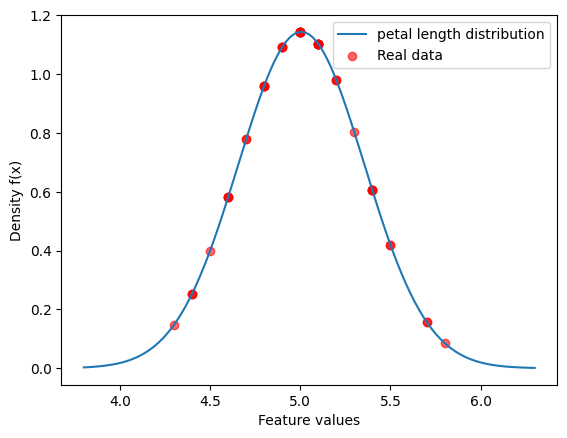

In [46]:
# PDF for setosa_sepal_length
mean, std = np.mean(setosa_sepal_length), np.std(setosa_sepal_length)

# PDF with real data
y_points = norm.pdf(setosa_sepal_length, mean, std)

plt.plot(x_range, pdf, label="petal length distribution")
plt.scatter(setosa_sepal_length, y_points, color="red", alpha=0.6, label="Real data")
plt.xlabel("Feature values")
plt.ylabel("Density f(x)")
plt.legend()
plt.show()


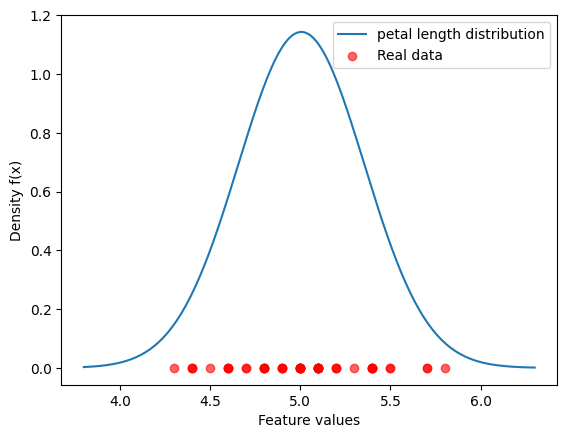

In [48]:
# Gaussiana curve
plt.plot(x_range, pdf, label="petal length distribution")
# plot the feature real data
plt.scatter(setosa_sepal_length, np.zeros_like(setosa_sepal_length), color="red", alpha=0.6, label="Real data")
plt.xlabel("Feature values")
plt.ylabel("Density f(x)")
plt.legend()
plt.show()

#### With all classes together

In [58]:
# Mean (μ)
mean = np.mean(sepal_length)

# Variance (σ²)
variance = np.var(sepal_length)

# Standard Deviation (σ = √σ²)
std_dev = np.std(sepal_length)

print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Mean: 5.843333333333334
Variance: 0.6811222222222223
Standard Deviation: 0.8253012917851409


In [61]:
x_range = np.linspace(sepal_length.min() - 0.5,
                      sepal_length.max() + 0.5,
                      200)

In [62]:
# Probability Density Function (PDF) da Normal
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(- (x_range - mean)**2 / (2 * std_dev**2))


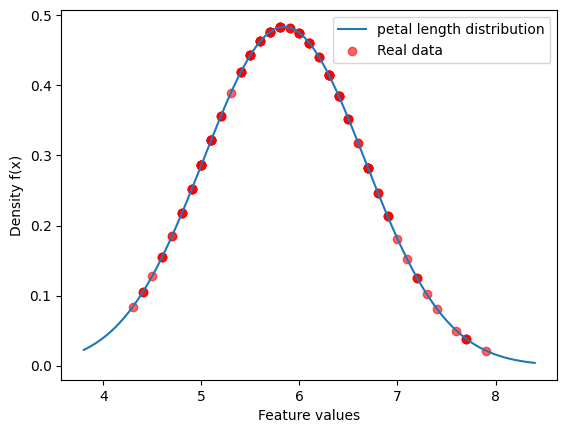

In [63]:
# PDF for setosa_sepal_length
mean, std = np.mean(sepal_length), np.std(sepal_length)

# PDF with real data
y_points = norm.pdf(sepal_length, mean, std)

plt.plot(x_range, pdf, label="petal length distribution")
plt.scatter(sepal_length, y_points, color="red", alpha=0.6, label="Real data")
plt.xlabel("Feature values")
plt.ylabel("Density f(x)")
plt.legend()
plt.show()


### Doing the same thing for **petal length**

In [64]:
print(iris.feature_names)
petal_length = iris.data[:,2]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [65]:
labels = iris.target
print(labels)

# filtering only setosa (class 0)
setosa_petal_length = petal_length[labels == 0]

print(setosa_petal_length)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]


In [66]:
# Mean (μ)
mean = np.mean(setosa_petal_length)

# Variance (σ²)
variance = np.var(setosa_petal_length)

# Standard Deviation (σ = √σ²)
std_dev = np.std(setosa_petal_length)

print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Mean: 1.4620000000000002
Variance: 0.029555999999999995
Standard Deviation: 0.17191858538273283


In [67]:
x_range = np.linspace(setosa_petal_length.min() - 0.5,
                      setosa_petal_length.max() + 0.5,
                      200)

In [68]:
# Probability Density Function (PDF) da Normal
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(- (x_range - mean)**2 / (2 * std_dev**2))

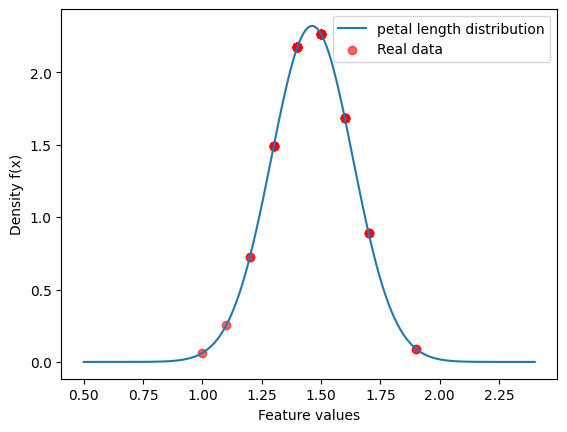

In [73]:
# PDF for setosa_petal_length
mean, std = np.mean(setosa_petal_length), np.std(setosa_petal_length)

# PDF with real data
y_points = norm.pdf(setosa_petal_length, mean, std)

plt.plot(x_range, pdf, label="petal length distribution")
plt.scatter(setosa_petal_length, y_points, color="red", alpha=0.6, label="Real data")
plt.xlabel("Feature values")
plt.ylabel("Density f(x)")
plt.legend()
plt.show()


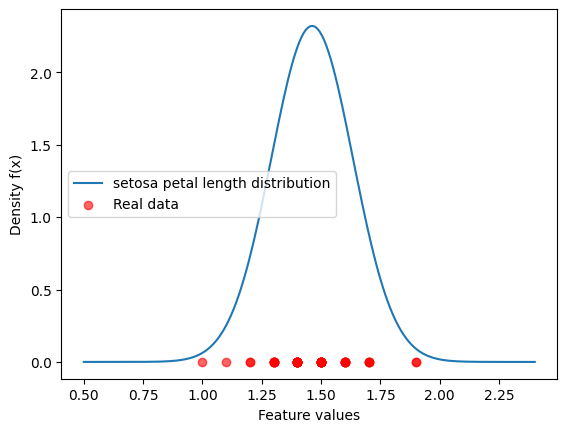

In [74]:
# Gaussiana curve
plt.plot(x_range, pdf, label="setosa petal length distribution")
# plot the feature real data
plt.scatter(setosa_petal_length, np.zeros_like(setosa_petal_length), color="red", alpha=0.6, label="Real data")
plt.xlabel("Feature values")
plt.ylabel("Density f(x)")
plt.legend()
plt.show()

#### With all classes together

In [81]:
# Mean (μ)
mean = np.mean(petal_length)

# Variance (σ²)
variance = np.var(petal_length)

# Standard Deviation (σ = √σ²)
std_dev = np.std(petal_length)

print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Mean: 3.7580000000000005
Variance: 3.0955026666666665
Standard Deviation: 1.759404065775303


In [82]:
x_range = np.linspace(petal_length.min() - 0.5,
                      petal_length.max() + 0.5,
                      200)

In [83]:
# Probability Density Function (PDF) da Normal
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(- (x_range - mean)**2 / (2 * std_dev**2))

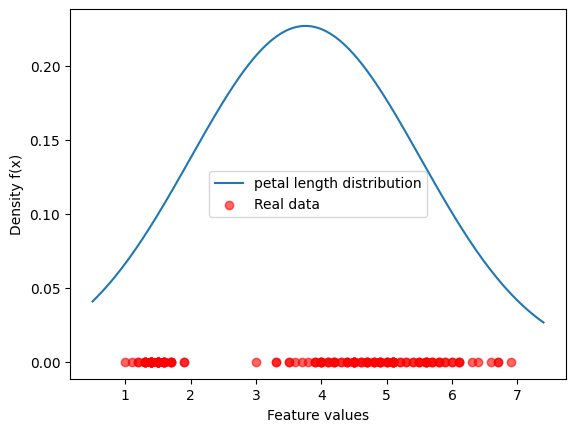

In [84]:
plt.plot(x_range, pdf, label="petal length distribution")
plt.scatter(petal_length, np.zeros_like(petal_length), color="red", alpha=0.6, label="Real data")
plt.xlabel("Feature values")
plt.ylabel("Density f(x)")
plt.legend()
plt.show()


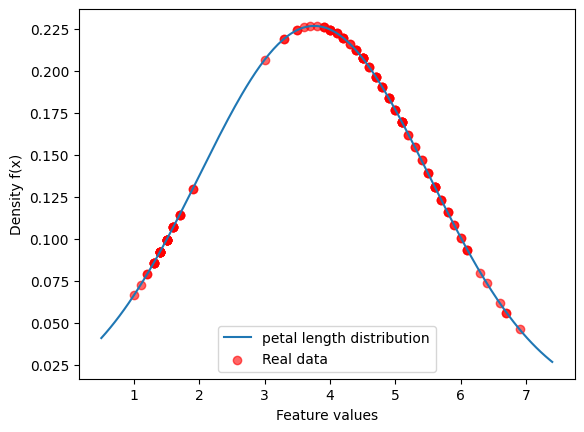

In [86]:
# PDF for setosa_petal_length
mean, std = np.mean(petal_length), np.std(petal_length)

# PDF with real data
y_points = norm.pdf(petal_length, mean, std)

plt.plot(x_range, pdf, label="petal length distribution")
plt.scatter(petal_length, y_points, color="red", alpha=0.6, label="Real data")
plt.xlabel("Feature values")
plt.ylabel("Density f(x)")
plt.legend()
plt.show()
